In [ ]:
import matplotlib.pyplot as plt
import pystac_client

from mccn._types import CubeConfig, FilterConfig, ProcessConfig
from mccn.extent import GeoBoxBuilder
from mccn.loader.point import PointLoadConfig, PointLoader
from mccn.client import parse_item

client = pystac_client.Client.open("http://203.101.230.81:8082")

### Silo STD

In [ ]:
silo_std_collection = client.get_collection("silo_std")
silo_std_loader = PointLoader(
    items=[parse_item(item) for item in silo_std_collection.get_items(recursive=True)],
    cube_config=CubeConfig(use_z=True),
    filter_config=FilterConfig(
        geobox=GeoBoxBuilder.from_collection(silo_std_collection, 10)
    ),
    load_config=PointLoadConfig(interp=None),
    process_config=ProcessConfig(rename_bands={"Tmax": "t_max", "Tmin": "t_min"}),
)
silo_std_ds = silo_std_loader.load()
silo_std_ds

In [ ]:
plt.imshow(silo_std_ds.sel(time="2025-03-01", alt=45).t_max.values)
plt.show()

### Silo Proc Bands

In [ ]:
silo_proc_bands_collection = client.get_collection("silo_proc_bands")
silo_proc_bands_loader = PointLoader(
    items=[
        parse_item(item)
        for item in silo_proc_bands_collection.get_items(recursive=True)
    ],
    cube_config=CubeConfig(use_z=True),
    filter_config=FilterConfig(
        geobox=GeoBoxBuilder.from_collection(silo_proc_bands_collection, 10)
    ),
    load_config=PointLoadConfig(interp=None),
    process_config=ProcessConfig(
        rename_bands={"Tmax": "t_max", "Tmin": "t_min"},
        process_bands={
            "elevation_ft": lambda x: x // 3.280,
            "t_avg_f": lambda x: (x - 32) / (9 / 5),
        },
    ),
)
silo_proc_bands_ds = silo_proc_bands_loader.load()
silo_proc_bands_ds

### Soil

In [ ]:
soil_collection = client.get_collection("soil")
soil_loader = PointLoader(
    items=[parse_item(item) for item in soil_collection.get_items(recursive=True)],
    cube_config=CubeConfig(use_z=False),
    filter_config=FilterConfig(
        geobox=GeoBoxBuilder.from_collection(soil_collection, 10)
    ),
    load_config=PointLoadConfig(interp=None),
    # process_config=ProcessConfig(rename_bands={"Tmax": "t_max", "Tmin": "t_min"})
)
soil_ds = soil_loader.load()
soil_ds

In [ ]:
plt.imshow(soil_ds.S.values[0, :, :])
plt.show()

### Campey Point

In [ ]:
campey_point_collection = client.get_collection("campey_point")
campey_point_loader = PointLoader(
    items=[
        parse_item(item) for item in campey_point_collection.get_items(recursive=True)
    ],
    cube_config=CubeConfig(use_z=False),
    filter_config=FilterConfig(
        geobox=GeoBoxBuilder.from_collection(campey_point_collection, 200)
    ),
    load_config=PointLoadConfig(interp="nearest"),
)
campey_point_ds = campey_point_loader.load()
campey_point_ds

In [ ]:
plt.imshow(campey_point_ds.moisture.values[0, :, :])
plt.show()

In [1]:
from mccn.client import MCCN
import matplotlib.pyplot as plt 

In [2]:
engine = MCCN("http://203.101.230.81:8082/", "CaladeniaStudy", 100)

In [6]:
ds = engine.load()

In [7]:
ds

<xarray.Dataset> Size: 2MB
Dimensions:         (time: 4, y: 100, x: 100)
Coordinates:
  * time            (time) datetime64[ns] 32B 1993-05-16T13:55:00 ... 2024-11...
  * y               (y) float64 800B -34.71 -34.72 -34.73 ... -35.89 -35.91
  * x               (x) float64 800B 148.6 148.7 148.7 ... 150.7 150.7 150.7
    spatial_ref     int32 4B 4326
Data variables:
    scientificName  (time, y, x) float64 320kB nan nan nan nan ... 0.0 0.0 0.0
    PA_PID          (time, y, x) float64 320kB nan nan nan nan ... nan nan nan
    PA_ID           (time, y, x) float64 320kB nan nan nan nan ... nan nan nan
    OBJECTID        (time, y, x) float64 320kB nan nan nan nan ... nan nan nan
    ACT_Boundary    (time, y, x) float64 320kB 0.0 0.0 0.0 0.0 ... nan nan nan
    band_1          (time, y, x) float32 160kB nan nan nan nan ... nan nan nan
Attributes:
    scientificName:  {'Caladenia atrovespa': 1, 'Caladenia alpina': 2, 'Calad...
    PA_PID:          {1: 'ACT_34', 2: 'ACT_01', 3: 'ACT_03', 4: 'ACT_39_b', 5...
    PA_ID:           {1: 'ACT_34', 2: 'ACT_01', 3: 'ACT_03', 4: 'ACT_39', 5: ...

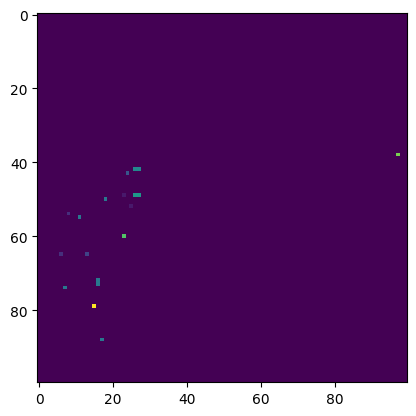

In [4]:
plt.imshow(ds.scientificName.values[0,:,:])

In [5]:
ds

<xarray.Dataset> Size: 82kB
Dimensions:         (time: 1, y: 100, x: 100)
Coordinates:
  * time            (time) datetime64[ns] 8B 2024-11-18T13:55:00
    spatial_ref     int32 4B 4326
  * y               (y) float64 800B -34.71 -34.72 -34.73 ... -35.89 -35.91
  * x               (x) float64 800B 148.6 148.7 148.7 ... 150.7 150.7 150.7
Data variables:
    scientificName  (time, y, x) float64 80kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    scientificName:  {'Caladenia atrovespa': 1, 'Caladenia alpina': 2, 'Calad...